In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import gmaps
import os

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import g_key
from api_keys import weather_api_key
gmaps.configure(api_key=g_key)

# Save config information.
map_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# Build partial query URL
map_query_url = f"{map_url}&key={g_key}&address="

# Input File (CSV)
input_data_file_city = "Data/annual_aqi_by_cbsa_2019.csv"
input_data_file_county = "Data/annual_aqi_by_county_2019.csv"

aqi_city = pd.read_csv(input_data_file_city)
aqi_county = pd.read_csv(input_data_file_county)

In [2]:
########################
#CREATING DATA BY STATE
########################
aqi_county_groups = aqi_county.set_index('State').groupby(['State'])

# Get Average data by State
good_days = aqi_county_groups["Good Days"].mean()
moderate_days = aqi_county_groups["Moderate Days"].mean()
unhealthy_days = aqi_county_groups["Unhealthy Days"].mean()
very_unhealthy_days = aqi_county_groups["Very Unhealthy Days"].mean()
hazardous_days = aqi_county_groups["Hazardous Days"].mean()
days_co = aqi_county_groups["Days CO"].mean()
days_no2 = aqi_county_groups["Days NO2"].mean()
days_ozone = aqi_county_groups["Days Ozone"].mean()
days_so2 = aqi_county_groups["Days SO2"].mean()

# Create DataFrame
aqi_state_summary = pd.DataFrame({"Good Days" : good_days,
                                  "Moderate Days" : moderate_days,
                                  "Unhealthy Days" : unhealthy_days,
                                  "Very Unhealthy Days" : very_unhealthy_days,
                                  "Hazardous Days" : hazardous_days,
                                  "Days CO" : days_co,
                                  "Days NO2" : days_no2,
                                  "Days Ozone" : days_ozone,
                                  "Days SO2" : days_so2                                  
                             })

aqi_state_summary.head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Alabama,142.687500,32.937500,0.062500,0.000000,0.000000,0.062500,0.062500,105.187500,4.625000
Alaska,157.500000,25.333333,1.333333,0.000000,0.000000,0.500000,2.666667,52.833333,0.166667
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
Arkansas,146.384615,32.615385,0.000000,0.000000,0.000000,0.076923,0.153846,88.538462,0.000000
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736


In [3]:
# Top 5 States with Good Days
aqi_state_summary.sort_values(by='Good Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Maine,257.600000,13.300000,0.1,0.0,0.0,0.300000,5.000000,209.400000,0.000000
North Dakota,250.000000,22.500000,0.1,0.0,0.0,0.100000,2.000000,221.000000,5.700000
New York,237.000000,22.903226,0.0,0.0,0.0,0.258065,3.709677,179.419355,27.258065
Massachusetts,215.538462,25.153846,0.0,0.0,0.0,0.153846,4.923077,192.923077,0.000000
Mississippi,211.300000,42.300000,0.0,0.0,0.0,0.100000,0.100000,144.300000,0.000000


In [4]:
# Top 5 States with Hazardous Days
aqi_state_summary.sort_values(by='Hazardous Days', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Puerto Rico,89.000000,19.000000,0.200000,2.600000,2.000000,22.300000,13.300000,9.800000,10.300000
Arizona,183.846154,80.615385,0.538462,0.230769,0.538462,0.153846,0.076923,174.769231,5.692308
New Mexico,133.818182,69.909091,0.272727,0.181818,0.272727,0.000000,0.818182,161.727273,0.090909
California,157.075472,43.396226,0.566038,0.018868,0.132075,0.283019,1.867925,140.264151,0.037736
Colorado,131.440000,54.120000,0.080000,0.000000,0.040000,0.320000,3.920000,140.520000,0.120000


In [5]:
# Top 5 States with higher than normal Ozone
aqi_state_summary.sort_values(by='Days Ozone', ascending=False).head()

,Good Days,Moderate Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Days CO,Days NO2,Days Ozone,Days SO2
State,,,,,,,,,
Utah,192.357143,75.357143,0.571429,0.071429,0.0,0.214286,9.928571,243.357143,0.071429
Delaware,208.333333,64.000000,0.000000,0.000000,0.0,0.333333,1.333333,223.333333,0.000000
North Dakota,250.000000,22.500000,0.100000,0.000000,0.0,0.100000,2.000000,221.000000,5.700000
Maine,257.600000,13.300000,0.100000,0.000000,0.0,0.300000,5.000000,209.400000,0.000000
Massachusetts,215.538462,25.153846,0.000000,0.000000,0.0,0.153846,4.923077,192.923077,0.000000


In [13]:
########################
#CREATING DATA BY CITY
########################

# Data is not collected for all 365 days by each city so an accurate picture cannot be attained with certainty. 
#This has to be taken into consideration when looking at results

#collected data percentage 
aqi_city["Year Coverage"] = aqi_city["Days with AQI"] / 365
aqi_city["Good Day Percent"] = aqi_city["Good Days"]/aqi_city["Days with AQI"]

# Cities with best data coverage for evaluation (atleast 70% or higher data collected in 365 days)  
coverage = aqi_city.loc[aqi_city["Year Coverage"] >= .70]
coverage_df = pd.DataFrame(coverage)

# Top 5 cities with best air quality
coverage_df.sort_values(['Good Day Percent'], ascending=[False]).head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Year Coverage,Good Day Percent
282,"Malone, NY",31660,2019,272,272,0,0,0,0,0,...,0,0,0,0,0,272,0,0,0.745205,1.000000
27,"Augusta-Waterville, ME",12300,2019,270,266,4,0,0,0,0,...,45,33,0,50,210,0,10,0,0.739726,0.985185
254,"Lake Havasu City-Kingman, AZ",29420,2019,273,268,5,0,0,0,0,...,29,15,0,0,0,0,0,273,0.747945,0.981685
477,"Utica-Rome, NY",46540,2019,267,260,7,0,0,0,0,...,40,27,0,0,115,0,152,0,0.731507,0.973783
31,"Bangor, ME",12620,2019,304,294,10,0,0,0,0,...,45,33,0,0,208,0,92,4,0.832877,0.967105


In [7]:
# The original imported dataset for AQI does not have Latitude and Longitude for each city.  In order to map it, lat & Lng
# is pulled from google

available_cities = []
state = []
lats = []
lngs = []
medianAQI = []
good_days = []
hazardous_days = []
percentile = []

print("----------Pulling City Lat and Lng data------------")

#loop through all the cities from the imported dataset
for i in range (len(aqi_city['CBSA'])):
    try:
        #handle spaces in city names
        response = requests.get(map_query_url + aqi_city['CBSA'][i].replace(" ","+")).json()

        #gather city data
        available_cities.append(aqi_city['CBSA'][i])
        
        #get state from city name
        state.append(aqi_city['CBSA'][i].rsplit(", ")[1])
        
        #get lat & Lng from json response
        lat = round(response['results'][0]['geometry']['location']['lat'], 2)
        lng = round(response['results'][0]['geometry']['location']['lng'], 2)
        lats.append(lat)
        lngs.append(lng)
        
        #collect medianAQI for found cities
        medianAQI.append(aqi_city['Median AQI'][i])
        
        #collect good days for found cities
        good_days.append(aqi_city['Good Days'][i])
        
        #collect hazardous days for found cities
        hazardous_days.append(aqi_city['Hazardous Days'][i])
        
        #collect percentile AQI 
        percentile.append(aqi_city['90th Percentile AQI'][i])

        #print city data as its aquired
        print(aqi_city['CBSA'][i] + ", Lat:" + str(lat) + ", Lng:" + str(lng))
              
    except Exception:
        #print city name that was not found
        print(aqi_city['CBSA'][i] + " not found!")

print("-------------Data Read Completed-------------")

available_city_data = {
    "City":available_cities,
    "State": state,
    "Lat":lats,
    "Lng":lngs,
    "AQI": medianAQI,
    "Good Days": good_days,
    "Hazardous Days": hazardous_days,
    "90th Percentile AQI": percentile
}


----------Pulling City Lat and Lng data------------
Aberdeen, SD, Median AQI = 24 Lat:45.46, Lng:-98.49
Aberdeen, WA, Median AQI = 18 Lat:46.98, Lng:-123.82
Adjuntas, PR, Median AQI = 18 Lat:18.16, Lng:-66.72
Adrian, MI, Median AQI = 40 Lat:41.9, Lng:-84.04
Akron, OH, Median AQI = 44 Lat:41.08, Lng:-81.52
Albany, GA, Median AQI = 44 Lat:31.58, Lng:-84.16
Albany, OR, Median AQI = 26 Lat:44.64, Lng:-123.11
Albany-Schenectady-Troy, NY, Median AQI = 39 Lat:42.76, Lng:-73.65
Albuquerque, NM, Median AQI = 54 Lat:35.08, Lng:-106.65
Alexandria, LA, Median AQI = 29 Lat:31.31, Lng:-92.45
Allentown-Bethlehem-Easton, PA-NJ, Median AQI = 42 Lat:40.58, Lng:-75.5
Altoona, PA, Median AQI = 42 Lat:40.52, Lng:-78.39
Amarillo, TX, Median AQI = 45 Lat:35.22, Lng:-101.83
Americus, GA, Median AQI = 40 Lat:32.07, Lng:-84.23
Anchorage, AK, Median AQI = 31 Lat:61.22, Lng:-149.9
Ann Arbor, MI, Median AQI = 39 Lat:42.28, Lng:-83.74
Appleton, WI, Median AQI = 38 Lat:44.26, Lng:-88.42
Ardmore, OK, Median AQI = 44 

Elizabethtown-Fort Knox, KY, Median AQI = 33 Lat:37.88, Lng:-85.97
Elkhart-Goshen, IN, Median AQI = 38 Lat:41.58, Lng:-85.83
Elko, NV, Median AQI = 9 Lat:40.83, Lng:-115.76
Ellensburg, WA, Median AQI = 21 Lat:47.0, Lng:-120.55
Enid, OK, Median AQI = 0 Lat:36.4, Lng:-97.88
Erie, PA, Median AQI = 37 Lat:42.13, Lng:-80.09
Espa¤ola, NM, Median AQI = 45 Lat:35.99, Lng:-106.08
Eugene, OR, Median AQI = 37 Lat:44.05, Lng:-123.09
Eureka-Arcata-Fortuna, CA, Median AQI = 30 Lat:40.8, Lng:-124.16
Evanston, WY, Median AQI = 44 Lat:41.27, Lng:-110.96
Evansville, IN-KY, Median AQI = 44 Lat:37.97, Lng:-87.57
Fairbanks, AK, Median AQI = 39 Lat:64.84, Lng:-147.72
Fairmont, WV, Median AQI = 28 Lat:39.49, Lng:-80.14
Fallon, NV, Median AQI = 42 Lat:39.47, Lng:-118.78
Fargo, ND-MN, Median AQI = 36 Lat:46.88, Lng:-96.79
Farmington, NM, Median AQI = 49 Lat:36.73, Lng:-108.22
Fayetteville, NC, Median AQI = 44 Lat:35.05, Lng:-78.88
Fayetteville-Springdale-Rogers, AR-MO, Median AQI = 46 Lat:36.01, Lng:-94.23
Fer

Mason City, IA, Median AQI = 15 Lat:43.15, Lng:-93.2
Mayaguez, PR, Median AQI = 41 Lat:18.2, Lng:-67.15
McAlester, OK, Median AQI = 44 Lat:34.93, Lng:-95.77
McAllen-Edinburg-Mission, TX, Median AQI = 45 Lat:26.23, Lng:-98.18
Medford, OR, Median AQI = 35 Lat:42.33, Lng:-122.88
Memphis, TN-MS-AR, Median AQI = 46 Lat:35.04, Lng:-89.85
Merced, CA, Median AQI = 30 Lat:37.3, Lng:-120.48
Meridian, MS, Median AQI = 37 Lat:32.36, Lng:-88.7
Miami, OK, Median AQI = 41 Lat:36.87, Lng:-94.88
Miami-Fort Lauderdale-West Palm Beach, FL, Median AQI = 43 Lat:26.3, Lng:-80.63
Michigan City-La Porte, IN, Median AQI = 40 Lat:41.71, Lng:-86.9
Middlesborough, KY, Median AQI = 40 Lat:36.61, Lng:-83.71
Milwaukee-Waukesha-West Allis, WI, Median AQI = 44 Lat:43.01, Lng:-88.32
Minneapolis-St. Paul-Bloomington, MN-WI, Median AQI = 40 Lat:44.84, Lng:-93.3
Minot, ND, Median AQI = 31 Lat:48.23, Lng:-101.29
Missoula, MT, Median AQI = 40 Lat:46.87, Lng:-113.99
Mobile, AL, Median AQI = 42 Lat:30.7, Lng:-88.04
Modesto, C

Sheboygan, WI, Median AQI = 39 Lat:43.75, Lng:-87.71
Shelton, WA, Median AQI = 20 Lat:47.22, Lng:-123.1
Sheridan, WY, Median AQI = 42 Lat:44.8, Lng:-106.96
Show Low, AZ, Median AQI = 45 Lat:34.25, Lng:-110.03
Shreveport-Bossier City, LA, Median AQI = 39 Lat:32.52, Lng:-93.73
Sierra Vista-Douglas, AZ, Median AQI = 47 Lat:31.83, Lng:-109.95
Sioux City, IA-NE-SD, Median AQI = 38 Lat:42.5, Lng:-96.4
Sioux Falls, SD, Median AQI = 42 Lat:43.55, Lng:-96.73
Somerset, KY, Median AQI = 37 Lat:37.09, Lng:-84.6
Somerset, PA, Median AQI = 39 Lat:40.01, Lng:-79.08
Sonora, CA, Median AQI = 39 Lat:37.98, Lng:-120.38
South Bend-Mishawaka, IN-MI, Median AQI = 44 Lat:41.66, Lng:-86.16
Spartanburg, SC, Median AQI = 46 Lat:34.95, Lng:-81.93
Spokane-Spokane Valley, WA, Median AQI = 42 Lat:47.67, Lng:-117.24
Springfield, IL, Median AQI = 42 Lat:39.78, Lng:-89.65
Springfield, MA, Median AQI = 43 Lat:42.1, Lng:-72.59
Springfield, MO, Median AQI = 42 Lat:37.21, Lng:-93.29
Springfield, OH, Median AQI = 46 Lat:39

In [15]:
map_ready_data = pd.DataFrame(available_city_data)
map_ready_data.head()

,City,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
0,"Aberdeen, SD",SD,45.46,-98.49,24,52,0,56
1,"Aberdeen, WA",WA,46.98,-123.82,18,199,0,30
2,"Adjuntas, PR",PR,18.16,-66.72,18,53,0,44
3,"Adrian, MI",MI,41.90,-84.04,40,145,0,57
4,"Akron, OH",OH,41.08,-81.52,44,203,0,62


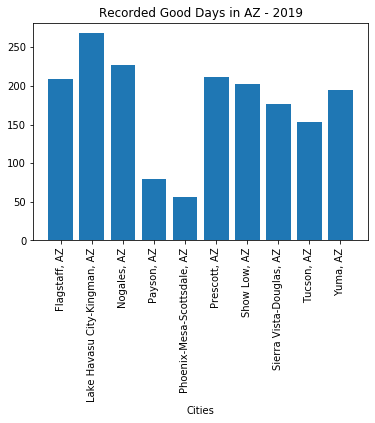

,City,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
162,"Flagstaff, AZ",AZ,35.20,-111.65,46,209,0,61
254,"Lake Havasu City-Kingman, AZ",AZ,34.48,-114.32,15,268,0,29
332,"Nogales, AZ",AZ,31.34,-110.93,29,227,0,56
354,"Payson, AZ",AZ,34.23,-111.33,67,79,0,112
358,"Phoenix-Mesa-Scottsdale, AZ",AZ,33.42,-111.83,67,56,7,104
372,"Prescott, AZ",AZ,34.54,-112.47,44,211,0,58
433,"Show Low, AZ",AZ,34.25,-110.03,45,203,0,61
435,"Sierra Vista-Douglas, AZ",AZ,31.83,-109.95,47,176,0,71
469,"Tucson, AZ",AZ,32.22,-110.97,49,153,0,74
519,"Yuma, AZ",AZ,32.69,-114.63,46,195,0,71


In [9]:
# Hypothesis: An assumption can be made that region with higher concentration of population & industry can reduce air quality
# Congested metropolitan city like Phoenix with high traffic volume and more industries would show lower number of Good Days 
# (AQI between 0-50) than cities that have lower population, low traffic and no pollution creating industry

AZ_data = map_ready_data.loc[map_ready_data["State"] == 'AZ']

#create bar chart
x_axis = np.arange(len(AZ_data))
plt.bar(x_axis, AZ_data["Good Days"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, AZ_data["City"], rotation="vertical")
plt.title('Recorded Good Days in AZ - 2019')
plt.xlabel('Cities')
plt.show()
AZ_data

# Conclusion: Phoenix metropolitan area does experiences lower number of Good Days.  Lake Havasu City-Kingman reported 
# higher number of Good Days with low median AQI

In [17]:
# Heatmap of Arizona based on AQI data
location_data = AZ_data[["Lat","Lng"]]
data = AZ_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

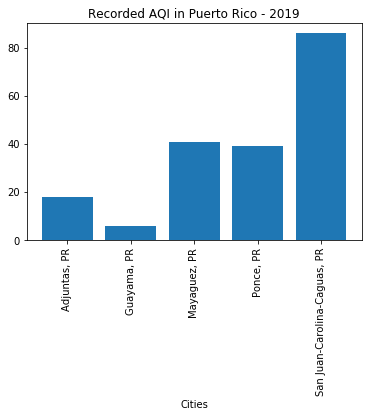

,City,State,Lat,Lng,AQI,Good Days,Hazardous Days,90th Percentile AQI
2,"Adjuntas, PR",PR,18.16,-66.72,18,53,0,44
192,"Guayama, PR",PR,17.98,-66.11,6,74,0,7
289,"Mayaguez, PR",PR,18.20,-67.15,41,12,0,71
366,"Ponce, PR",PR,18.01,-66.61,39,104,0,67
411,"San Juan-Carolina-Caguas, PR",PR,18.24,-66.04,86,37,20,316


In [10]:
# Top 5 States with Hazardous Days resulted in Puerto Rico as a territory with most number of Hazardous Days.
# below graphs shows which city had the most Hazardous days in Puerto Rico 
by_state_data = map_ready_data.loc[map_ready_data["State"] == 'PR']

#create bar chart
x_axis = np.arange(len(by_state_data))
plt.bar(x_axis, by_state_data["AQI"], align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, by_state_data["City"], rotation="vertical")
plt.title('Recorded AQI in Puerto Rico - 2019')
plt.xlabel('Cities')
plt.show()
by_state_data

#Conclusion: San Juan-Carolina-Caguas had the most occurance with Hazardous Days

In [18]:
# Heatmap of Puerto Rico based on AQI data
location_data = by_state_data[["Lat","Lng"]]
data = by_state_data["AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=100,
                              point_radius=1)
fig.add_layer(heatmap)
fig

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…

In [11]:
# Hypothesis: CNN Article on Tue 4/7/2020 showed a heatmap of US with cities that have PM 2.5 higher than 13 micrograms.
# The data was averaged from 2000-2016. Using the data from Annual AQI by CBSA 2019, we want to see if 2019 data shows
# same heatmap as CNN source.  
# Source article URL: https://www.cnn.com/2020/04/07/health/covid-19-air-pollution-risks-wellness/index.html

#AQI Value AQI Category AQI Color (Source: https://www.epa.gov/sites/production/files/2014-05/documents/zell-aqi.pdf)
#   0 - 50 Good Green
#  51 - 100 Moderate Yellow
# 101 - 150 Unhealthy for Sensitive Groups Orange
# 151 - 200 Unhealthy Red
# 201 - 300 Very Unhealthy Purple
# 301 - 500 Hazardous Maroon

AQI_data = map_ready_data.loc[map_ready_data["90th Percentile AQI"].astype(float) >= 51]
data_df = pd.DataFrame(AQI_data)

location_data = data_df[["Lat","Lng"]]
data = data_df["90th Percentile AQI"].astype(float)

#Figure Layout
figure_layout = {
    'width': '800px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)
heatmap = gmaps.heatmap_layer(location_data, weights=data,
                              dissipating=False, max_intensity=120,
                              point_radius=1)
fig.add_layer(heatmap)
fig

# Conclusion: 2019 Data below looks similar to the average data from 2000-2016 as shown in the article.  Visually, a case
# can be made that there are more cities with bad air quality in 2019 than average from 2000-2016.
# Souce: https://cdn.cnn.com/cnnnext/dam/assets/200407173521-20200407-covid-19-air-pollution-top-map-exlarge-169.jpg)

Figure(layout=FigureLayout(border='1px solid black', height='400px', margin='0 auto 0 auto', padding='1px', wi…